# exercise 8th weeks - text-mining classification 201521492 김형윤


텍스트마이닝-Classification 실습 자료

8주차 실습에서는 다음 4가지의 실습 중 하나 이상을 반드시 포함해야 합니다.

  1. featureset - bagofwords, tfidf, countvector

  2. 영문문서 분류

  3. 한글문서 분류

  4. 엔그램 

9주차 실습에서는 다음 4가지의 실습 중 하나 이상을 반드시 포함해야 합니다.

  1. 토픽모델링

  2. 토픽트렌드

  3. 워드투벡

  4. keras RNN 기반 문서 분류

## 1. 8주차 featureset - bagofwords, tfidf, countvector

In [2]:
# bag of words 함수 설정
def bag_of_words(words):
    return dict([(word, True) for word in words]) 

In [39]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word tokenize한 결과 중 앞 열 단어

review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [7]:
import nltk
nltk.download('punkt')
# 에러가 나서 추가적으로 punkt 를 다운

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word tokenize한 결과 중 앞 열 단어

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['

In [6]:
import collections

#feature 추출을 위한 함수로, 앞서 정의한 bag_of_words()를 사용
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #''neg', 'pos' 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #각 label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats

lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [8]:
len(lfeats['neg'])

1000

In [9]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [10]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

In [11]:
from nltk.corpus import movie_reviews
import random
# category 별로 fileid를 추출하고, 해당 fileid에 대해 문서의 word tokenize된 결과를 가져와서 
# documents 집합을 구성
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [68]:
print(all_words)

<FreqDist with 39768 samples and 1583820 outcomes>


In [13]:
for word in list(all_words)[:10]:
    print(word, all_words[word])

plot 1513
: 3042
two 1911
teen 151
couples 27
go 1113
to 31937
a 38106
church 69
party 183


In [14]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:10]:
    print(word, all_words[word])
print(sorted_features[:10]) # 1~9등까지의 빈도수가 가장 높은 words 

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']


In [16]:
word_features = sorted_features[:2000] #빈도가 높은 상위 2000개의 단어만 추출하여 features를 구성

print(word_features[:100]) # 그 중에서 상위 100개 

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [17]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #2000개의 단어에 대해 True, False로 입력
    return features

# 함수식을 이용해 주어진 document를 "00" = True or False로 나타내는 dic으로 변환

In [18]:
#위에서 만든 documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [19]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 수 - 상위 2000개 단어
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용


2000
neg
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': False, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'i': True, 'he': True, 'but': True, 'on': True, 'are': True, 't': False, 'by': True, 'be': True, 'one': True, 'movie': False, 'an': True, 'who': True, 'not': True, 'you': False, 'from': True, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': True, 'all': True, '?': True, 'there': True, 'like': False, 'so': True, 'out': True, 'about': False, 'up': True, 'more': False, 'what': False, 'when': True, 'which': False, 'or': True, 'she': False, 'their': True, ':': True, 'some': True, 'just': True, 'can': False, 'if': True, 'we': False, 'him': False, 'into': True, 'even': False, 'only': True, 'than': False, 'no': False, 'good': False, 'time': False, 'most': True, 'its': True, 'will': Tru

In [20]:
# 주어진 문서의 label이 'neg'인지, 'pos'인지를 판단하는 분류기를 학습

In [21]:
train_set, test_set = featuresets[100:], featuresets[:100] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(5) #분류기에서 가장 중요한 영향을 미치는 상위 5개 요소 

0.82
Most Informative Features
             outstanding = True              pos : neg    =     10.8 : 1.0
                  seagal = True              neg : pos    =      7.8 : 1.0
                   mulan = True              pos : neg    =      7.0 : 1.0
             wonderfully = True              pos : neg    =      6.9 : 1.0
                  wasted = True              neg : pos    =      6.2 : 1.0


In [22]:
testfeat = bag_of_words(['the', 'actor', 'was', 'seagal']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['the', 'story', 'was', 'outstanding'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['the', 'plot', 'was', 'ludicrous']) # 터무니없는
print(classifier.classify(negfeat))
posfeat = bag_of_words(['kate', 'winslet', 'is', 'accessible']) # 이해가 돼!
print(classifier.classify(posfeat))

# 각 문장들이 부정적인지 긍정적인지 구분해준다.

neg
pos
neg
pos


In [23]:
# data 준비, 입력이 raw text임
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 2,000개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [25]:
print('reviews count:', len(reviews)) # reviews의 수 : 2000개

reviews count: 2000


In [26]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환
# 빈도수가 높은 순서대로 words를 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [27]:
print(X[0].toarray()[0, :100]) #변환된 결과의 첫째 feature set 중에서 앞 100개를 출력
print(max(X[0].toarray()[0])) #변환된 결과의 첫째 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3  2  2  2  4  1  4  2  0  0  0  0  4  0  0  4  1  5  3  1  0  1  2
  0  4  4  0  0  1  2  0  2  1  3  0  2  2  1  0  2  1  0  0  0  2  2  0
  3  2  5  1]
38


In [28]:
for word, count in zip(cv.get_feature_names()[:20], X[0].toarray()[0, :20]):
    print(word, ':', count) # 각 단어별 빈도수를 나타냄. 이를 zip을 이용하여 합침.

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8
s : 0
" : 0
it : 25
that : 13
- : 0
) : 0
( : 0
as : 1
with : 5
for : 4


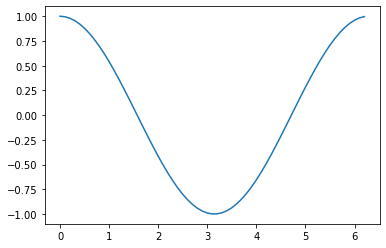

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation. they are small pokemon with a powerful punch and have great psychic abilities"

#여기서 부터 에러가 발생해서 당황.
#sim_result = cosine_similarity(new_vec, X) #변환된 count vector와 기존 값들과의 similarity 계산


In [52]:
print('new_review count:', len(new_review))

new_review count: 188


In [ ]:
# 여기서 더 나아가고 싶지만 시간 관계상 힘들고, 아직 실력이 부족하여
# 다음에 시간이 나면 다시 실습해보도록 하겠습니다,

## 2. 9주차 토픽모델링
영화 리뷰 데이터를 이용하여 topic modeling을 학습

토픽모델링은 텍스트 형태로 되어 있는 다수의 문서들로부터 공통적으로 내재되어 있는 주제들을 추출하기 위한 방법론이다.

In [85]:
import csv
text = []
y = []

with open('C:\\Users\\Administrator\\Downloads\\movie_data_new.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[0]) > 10: #review 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가

In [86]:
print('리뷰 수:', len(text))
print('리뷰영화:', set(y))

리뷰 수: 12445
리뷰영화: {'택시운전사', '곤지암', '라라랜드', '코코', '신과함께', '범죄도시', '인피니티 워'}


In [128]:
text[:7]

['헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...',
 '개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고 단적인 신념이 얼마나 부질없는지 보셔라',
 '정말 지루할틈없이 넘잘만들었다 역시 대단하다',
 '마지막에 누구한테 연락한거지? 궁금',
 '다음 편이 궁굼해지네요^^',
 '안잼있는사람 있음???????????',
 '잘 만들었다! 지루할 틈이 없네...']

#### 한글 처리를 위해서는 konlpy가 필요
topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용

In [94]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)
# 실행하는 데에 시간은 꽤 소요되었습니다,

In [92]:
pip install konlpy # konlpy가 없다고 에러가 나서 다운실행

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2
Note: you may need to restart the kernel to use updated packages.


In [95]:
review_cv.shape

(12445, 1000)

#### sklearn의 LatentDirichletAllocation을 이용하여 topic modeling 수행
다양한 argument를 적절히 이용하는 것이 중요

In [96]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [97]:
print('document-topic distribution dimenstion', review_topics.shape)

document-topic distribution dimenstion (12445, 10)


In [103]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        # ", "을 이용해서 끊어주기
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [102]:
print_top_words(lda,vec.get_feature_names(), 10)
# 놀랍습니다

Topic #0: 좀, 느낌, 감독, 공포영화, 공포, 보기, 감, 소재, 나름, 소리
Topic #1: 더, 정말, 말, 다시, 음악, 한번, 사랑, 모두, 작품, 인생
Topic #2: 스토리, 내용, 마블, 부분, 만, 이해, 조금, 영상, 전개, 수준
Topic #3: 생각, 영화, 것, 수, 듯, 한국, 역시, 신, 대한, 내내
Topic #4: 그, 광주, 편, 역사, 우리, 가슴, 송강호, 노스, 택시, 다음
Topic #5: 연기, 배우, 최고, 마동석, 윤계상, 액션, 차태현, 함, 한국영, 연기력
Topic #6: 사람, 진짜, 그냥, 원작, 때, 안, 뭐, 신파, 거, 하나
Topic #7: 감동, 눈물, 재미, 마지막, 꼭, 보고, 가족, 처음, 끝, 추천
Topic #8: 시간, 볼, 내, 왜, 기대, 중간, 또, 나, 별로, 임
Topic #9: 영화, 점, 이, 돈, 평점, 관객, 중, 눈, 천만, 난



#### 한 자로 구성된 명사들은 의미파악이 어려우므로 삭제할 필요가 있음
두 자 이상만 반환하는 함수를 작성

In [132]:
twitter_tag.nouns(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '적', '신념', '얼마나']

In [105]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]
# 길이가 2이상인 명사들만 리턴

In [106]:
tokenizer(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '신념', '얼마나']

'적'과 같이 한 자로 된 단어를 제거하고 count vector 생성

In [133]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 500) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [135]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=15, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 연기, 배우, 마동석, 윤계상, 액션, 영화, 차태현, 최고, 조연, 하정우
Topic #1: 스토리, 마블, 송강호, 역시, 노스, 택시, 주인공, 전개, 연기력, 배우
Topic #2: 정도, 장면, 원작, 신파, 마지막, 마음, 영화, 대한, 나름, 생각
Topic #3: 영화, 광주, 역사, 사람, 우리, 가슴, 현실, 사실, 기억, 소재
Topic #4: 재미, 보고, 사람, 생각, 영화, 부분, 한번, 웹툰, 내용, 공포
Topic #5: 영화, 중간, 관객, 이해, 때문, 완전, 조금, 다음, 천만, 생각
Topic #6: 영화, 시간, 가족, 보기, 아이, 한국영, 다른, 생각, 상영, 제대로
Topic #7: 눈물, 기대, 처음, 영화, 작품, 느낌, 별로, 내용, 마지막, 내내
Topic #8: 감동, 영화, 진짜, 다시, 음악, 최고, 사랑, 추천, 우리나라, 대박
Topic #9: 영화, 정말, 그냥, 평점, 감독, 수준, 최악, 엄마, 알바, 실망



In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [0 0 1 1 1 0 0 1 3 1 0 1 1 1 4 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1
 2 1 1 0 0 1 0 0 0 1 1 0 1]


In [111]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([  -6.949179  ,  -53.49401   , -156.57956   ,  -46.939014  ,
         56.485733  ,  -29.716232  , -125.482475  ,  136.42862   ,
        110.15663   , -117.80809   ,  -10.865295  ,    9.774828  ,
         74.02505   ,  -33.142303  ,   83.51573   ,  -87.200676  ,
        -92.081924  ,  -84.47544   ,  -19.687847  , -134.00212   ,
        122.0648    ,  133.9484    ,  -53.1566    ,   63.531685  ,
         28.457357  ,  -16.240503  ,  -59.76433   ,  -49.56166   ,
         14.863495  ,  -42.056747  ,  -97.79358   ,   14.14204   ,
        -62.900517  ,   79.143585  ,   42.47803   ,   58.135487  ,
         82.55377   ,   10.457184  ,   56.48281   ,  -41.110104  ,
         22.983059  ,   39.21739   ,   71.76845   ,   -0.75666666,
        -12.642868  ,  -33.12661   ,   10.020607  ,  -10.412574  ,
         22.035631  ,   42.73961   ], dtype=float32)

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

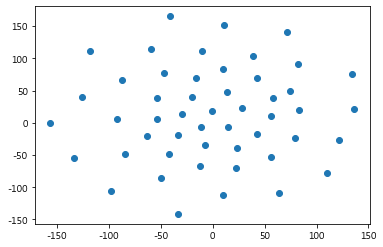

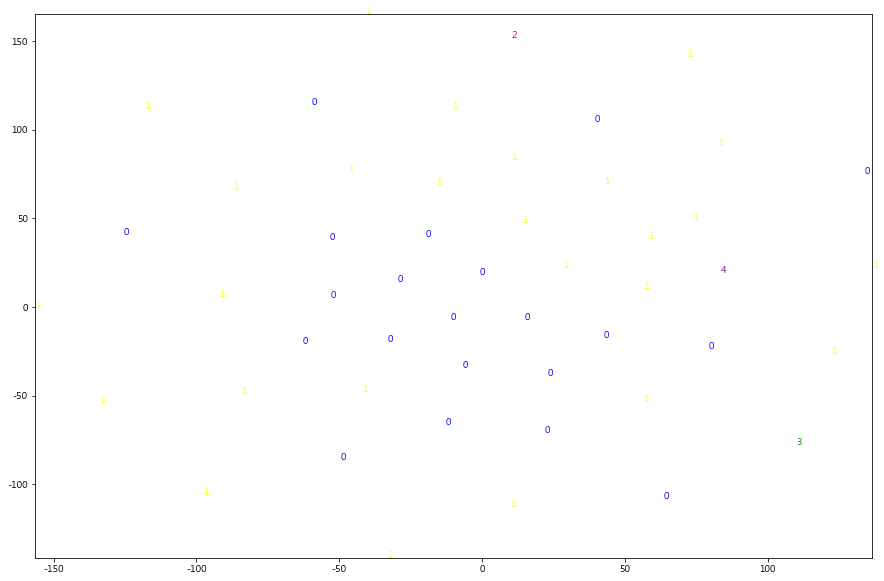

In [124]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

#### 최적의 결과를 찾기 위한 방법
적절한 topic의 수는 perplexity 값을 이용해 찾음.
낮을 수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음
http://qpleple.com/perplexity-to-evaluate-topic-models/
그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감
반복횟수는 5,000번 정도면 수렴

In [114]:
lda.perplexity(review_cv)

580.7734310430868

In [117]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 15, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 영화, 공포영화, 공포, 초반, 약간, 아주, 감동, 곤지암, 디즈니, 나름
Topic #1: 영화, 마블, 노스, 다음, 결말, 주인공, 작품, 어벤져스, 히어로, 뮤지컬
Topic #2: 연기, 마동석, 윤계상, 배우, 액션, 조연, 영화, 조선족, 주연, 간만
Topic #3: 광주, 택시, 모두, 시민, 인간, 가슴, 지금, 전두환, 운전사, 위해
Topic #4: 영화, 우리, 송강호, 역사, 계속, 감동, 개인, 사람, 웃음, 민주화
Topic #5: 영화, 평점, 웹툰, 원작, 기억, 내용, 만화, 강철, 사람, 공감
Topic #6: 영화, 생각, 한국, 귀신, 장면, 다시, 판타지, 배우, 여자, 스크린
Topic #7: 영화, 완전, 시간, 사람, 사실, 역사, 영상, 국민, 표현, 기자
Topic #8: 신파, 정말, 눈물, 차태현, 배우, 영화, 진짜, 김동욱, 대박, 하정우
Topic #9: 영화, 보고, 추천, 정말, 영화관, 범죄, 아들, 재미, 강추, 도시
Topic #10: 영화, 감동, 기대, 천만, 그냥, 우리나라, 알바, 재미, 쓰레기, 무슨
Topic #11: 영화, 사랑, 음악, 인생, 최고, 이야기, 마지막, 여운, 현실, 장면
Topic #12: 영화, 원작, 감동, 부분, 재미, 스토리, 실망, 내용, 그래픽, 그냥
Topic #13: 영화, 이해, 마지막, 진짜, 눈물, 감동, 사람, 정말, 감정, 최고
Topic #14: 스토리, 중간, 영화, 한국영, 전개, 억지, 감독, 최악, 내용, 얘기



487.35716470030144

In [116]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 감동, 영화, 가족, 보기, 아이, 역시, 아주, 기억, 약간, 뭔가
Topic #1: 마블, 음악, 사랑, 영화, 노스, 현실, 결말, 다음, 주인공, 여운
Topic #2: 연기, 배우, 최고, 마동석, 윤계상, 액션, 연출, 연기력, 조연, 캐릭터
Topic #3: 광주, 역사, 우리, 가슴, 송강호, 모두, 마음, 택시, 지금, 내내
Topic #4: 스토리, 느낌, 영화, 이야기, 작품, 관객, 때문, 별로, 조금, 몰입
Topic #5: 그냥, 내용, 영화, 원작, 평점, 웹툰, 수준, 이해, 천만, 소재
Topic #6: 영화, 생각, 감독, 한국, 다시, 한번, 공포영화, 공포, 최악, 나름
Topic #7: 사람, 시간, 마지막, 장면, 정도, 부분, 인생, 완전, 영상, 이영화
Topic #8: 정말, 진짜, 눈물, 신파, 중간, 차태현, 한국영, 대박, 억지, 하정우
Topic #9: 영화, 보고, 재미, 기대, 처음, 추천, 이제, 영화관, 관람, 후회



412.2882740895649